Análisis de Ventas | Proceso ETL + Consultas SQL + Visualización

## Proyecto ETL con análisis de ventas

Este proyecto simula el flujo básico que realiza un ingeniero de datos junior:

- 🗂️ Extracción de datos desde un archivo CSV.
- 🧹 Limpieza y transformación de datos en pandas.
- 🗃️ Carga de datos en una base de datos SQLite.
- 📊 Consultas SQL para análisis.
- 📈 Visualización de resultados con matplotlib y seaborn.



In [2]:
# Intentamos importar pandas con manejo de errores
import pandas as pd
# Leer el archivo CSV
df = pd.read_csv("ventas_productos.csv")
# Ver las primeras filas
print("Primeras filas del archivo:")
print(df.head())

Primeras filas del archivo:
   id       fecha        producto    categoria   precio  cantidad       ciudad
0   1  2025-04-05   Tenis Urbanos      Calzado   130000         4    Cartagena
1   2  2025-04-04     Reloj Smart  Electrónica   300000         4  Bucaramanga
2   3  2025-04-06  Audífonos X100  Electrónica   150000         5  Bucaramanga
3   4  2025-04-07      Laptop Z15  Electrónica  2200000         4  Bucaramanga
4   5  2025-04-01  Audífonos X100  Electrónica   150000         4     Medellín


In [3]:
# Ver información general del DataFrame
print("\nInformación del DataFrame:")
print(df.info())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         100 non-null    int64 
 1   fecha      100 non-null    object
 2   producto   100 non-null    object
 3   categoria  100 non-null    object
 4   precio     100 non-null    int64 
 5   cantidad   100 non-null    int64 
 6   ciudad     100 non-null    object
dtypes: int64(3), object(4)
memory usage: 5.6+ KB
None


In [4]:
# Ver resumen estadístico de columnas numéricas
print("\nResumen estadístico:")
print(df.describe())


Resumen estadístico:
               id        precio    cantidad
count  100.000000  1.000000e+02  100.000000
mean    50.500000  5.288000e+05    3.120000
std     29.011492  7.230830e+05    1.465289
min      1.000000  2.500000e+04    1.000000
25%     25.750000  1.200000e+05    2.000000
50%     50.500000  1.500000e+05    3.000000
75%     75.250000  8.000000e+05    4.000000
max    100.000000  2.200000e+06    5.000000


Paso 2: Limpieza y transformación de datos

Vamos a:

    Asegurar que la columna fecha sea de tipo datetime.

    Verificar y convertir precio y cantidad a numéricos.

    Crear una nueva columna: total_venta = precio * cantidad.

In [5]:
#CONVERTIR  LA  COLUMNA  EN FECHA A TIPO DATETIME
df['fecha'] = pd.to_datetime(df['fecha'])

#asegurar que precio y cantidad son numéricos
df['precio']= pd.to_numeric(df['precio'],errors='coerce')
df['cantidad']=pd.to_numeric(df['cantidad'], errors= 'coerce')
#crear  una  nueva columna 'total_venta'  que  sea  el  resultado  de  multiplicar  precio  por cantidad
df['total_venta'] = df['precio'] * df['cantidad']
# Verificamos cambios
print(df.head())

   id      fecha        producto    categoria   precio  cantidad       ciudad  \
0   1 2025-04-05   Tenis Urbanos      Calzado   130000         4    Cartagena   
1   2 2025-04-04     Reloj Smart  Electrónica   300000         4  Bucaramanga   
2   3 2025-04-06  Audífonos X100  Electrónica   150000         5  Bucaramanga   
3   4 2025-04-07      Laptop Z15  Electrónica  2200000         4  Bucaramanga   
4   5 2025-04-01  Audífonos X100  Electrónica   150000         4     Medellín   

   total_venta  
0       520000  
1      1200000  
2       750000  
3      8800000  
4       600000  


In [6]:
import sqlite3

# Volvemos a crear la columna en pandas (por si algo pasó)

conexion = sqlite3.connect("ventas.db")
# Cargar el DataFrame en una tabla llamada 'ventas'
df.to_sql("ventas",conexion,if_exists="replace",index=False)

# Verificar que se haya cargado correctamente (opcional)
consulta = "SELECT * FROM ventas LIMIT 5;"
resultado = pd.read_sql(consulta,conexion)
print("Primeras filas desde SQLite:")
print(resultado)
conexion.close()


Primeras filas desde SQLite:
   id                fecha        producto    categoria   precio  cantidad  \
0   1  2025-04-05 00:00:00   Tenis Urbanos      Calzado   130000         4   
1   2  2025-04-04 00:00:00     Reloj Smart  Electrónica   300000         4   
2   3  2025-04-06 00:00:00  Audífonos X100  Electrónica   150000         5   
3   4  2025-04-07 00:00:00      Laptop Z15  Electrónica  2200000         4   
4   5  2025-04-01 00:00:00  Audífonos X100  Electrónica   150000         4   

        ciudad  total_venta  
0    Cartagena       520000  
1  Bucaramanga      1200000  
2  Bucaramanga       750000  
3  Bucaramanga      8800000  
4     Medellín       600000  


In [7]:
# Conectar a la base de datos
conexion = sqlite3.connect("ventas.db")

# Consulta SQL corregida
consulta = """
SELECT categoria, SUM(total_venta) AS total_ventas
FROM ventas
GROUP BY categoria
ORDER BY total_ventas DESC;
"""

# Ejecutar consulta
resultados = pd.read_sql(consulta, conexion)
print("Total de ventas por categoría:")
print(resultados)

# Cerrar conexión
conexion.close()

Total de ventas por categoría:
     categoria  total_ventas
0  Electrónica     162550000
1      Calzado       8860000
2         Ropa       4365000


Total de ventas por ciudad

In [8]:
conexion = sqlite3.connect("ventas.db")

consulta = """
    SELECT ciudad, SUM(total_venta) AS total_ventas
    FROM ventas
    GROUP BY ciudad
    ORDER BY total_ventas DESC;
"""
ventas_por_ciudad = pd.read_sql(consulta, conexion)
print("ventas por ciudad:")
print(ventas_por_ciudad)
conexion.close()

ventas por ciudad:
         ciudad  total_ventas
0  Barranquilla      39700000
1      Medellín      38535000
2     Cartagena      37890000
3        Bogotá      25605000
4          Cali      17480000
5   Bucaramanga      16565000


Producto más vendido (por cantidad)

In [9]:
conexion = sqlite3.connect("ventas.db")

consulta = """
    SELECT producto, SUM(cantidad) AS total_vendida
    FROM ventas
    GROUP BY producto
    ORDER BY total_vendida DESC
    LIMIT 5;
"""
productos_top = pd.read_sql(consulta, conexion)
print("Top 5 productos más vendidos (por cantidad):")
print(productos_top)
conexion.close()

Top 5 productos más vendidos (por cantidad):
             producto  total_vendida
0          Laptop Z15             52
1      Audífonos X100             48
2       Camiseta Azul             40
3  Zapatos Deportivos             37
4         Reloj Smart             36


 Consulta 3: Ventas diarias totales

In [10]:
conexion = sqlite3.connect("ventas.db")

consulta = """
      SELECT fecha, SUM(total_venta) AS total_ventas
      FROM ventas
      GROUP BY fecha
      ORDER BY fecha;
"""
ventas_diarias = pd.read_sql(consulta, conexion)
print("Ventas diarias:")
print(ventas_diarias)
conexion.close()



Ventas diarias:
                  fecha  total_ventas
0   2025-04-01 00:00:00       5050000
1   2025-04-02 00:00:00       3650000
2   2025-04-03 00:00:00         75000
3   2025-04-04 00:00:00      22160000
4   2025-04-05 00:00:00        980000
5   2025-04-06 00:00:00      12390000
6   2025-04-07 00:00:00      11070000
7   2025-04-08 00:00:00       2025000
8   2025-04-09 00:00:00       2285000
9   2025-04-10 00:00:00      15000000
10  2025-04-11 00:00:00       2330000
11  2025-04-12 00:00:00       8200000
12  2025-04-13 00:00:00        800000
13  2025-04-14 00:00:00       1180000
14  2025-04-15 00:00:00        540000
15  2025-04-16 00:00:00       7360000
16  2025-04-17 00:00:00      20790000
17  2025-04-18 00:00:00       2010000
18  2025-04-19 00:00:00       5665000
19  2025-04-20 00:00:00       8800000
20  2025-04-21 00:00:00        445000
21  2025-04-22 00:00:00        390000
22  2025-04-23 00:00:00      13295000
23  2025-04-24 00:00:00      11650000
24  2025-04-25 00:00:00      10840

 Consulta 4: Precio promedio por categoría

In [11]:
conexion = sqlite3.connect("ventas.db")

consulta = """
        SELECT categoria, ROUND(AVG(precio), 2) AS precio_promedio
        FROM ventas
        GROUP BY categoria
        ORDER BY precio_promedio DESC;
"""
precio_promedio_categoria = pd.read_sql(consulta, conexion)
print("Precio promedio por categoría:")
print(precio_promedio_categoria)
conexion.close()

Precio promedio por categoría:
     categoria  precio_promedio
0  Electrónica        880909.09
1      Calzado        124583.33
2         Ropa         68571.43


Crear funciones para automatizar consultas SQL

In [12]:


# Función para ejecutar consultas SQL
def ejecutar_consulta(sql):
    with sqlite3.connect("ventas.db") as conn:
        return pd.read_sql(sql, conn)

# 1. Total de ventas por ciudad
def ventas_por_ciudad():
    consulta = """
    SELECT ciudad, SUM(total_venta) AS total_ventas
    FROM ventas
    GROUP BY ciudad
    ORDER BY total_ventas DESC;
    """
    return ejecutar_consulta(consulta)

# 2. Top productos más vendidos
def productos_top_vendidos(limit=5):
    consulta = f"""
    SELECT producto, SUM(cantidad) AS total_vendida
    FROM ventas
    GROUP BY producto
    ORDER BY total_vendida DESC
    LIMIT {limit};
    """
    return ejecutar_consulta(consulta)

# 3. Ventas por día
def ventas_por_dia():
    consulta = """
    SELECT fecha, SUM(total_venta) AS total_ventas
    FROM ventas
    GROUP BY fecha
    ORDER BY fecha;
    """
    return ejecutar_consulta(consulta)

# 4. Precio promedio por categoría
def precio_promedio_por_categoria():
    consulta = """
    SELECT categoria, ROUND(AVG(precio), 2) AS precio_promedio
    FROM ventas
    GROUP BY categoria
    ORDER BY precio_promedio DESC;
    """
    return ejecutar_consulta(consulta)

# Ejemplo de uso:
print("➡️ Ventas por ciudad:")
print(ventas_por_ciudad())

print("\n➡️ Top productos más vendidos:")
print(productos_top_vendidos())

print("\n➡️ Ventas por día:")
print(ventas_por_dia())

print("\n➡️ Precio promedio por categoría:")
print(precio_promedio_por_categoria())


➡️ Ventas por ciudad:
         ciudad  total_ventas
0  Barranquilla      39700000
1      Medellín      38535000
2     Cartagena      37890000
3        Bogotá      25605000
4          Cali      17480000
5   Bucaramanga      16565000

➡️ Top productos más vendidos:
             producto  total_vendida
0          Laptop Z15             52
1      Audífonos X100             48
2       Camiseta Azul             40
3  Zapatos Deportivos             37
4         Reloj Smart             36

➡️ Ventas por día:
                  fecha  total_ventas
0   2025-04-01 00:00:00       5050000
1   2025-04-02 00:00:00       3650000
2   2025-04-03 00:00:00         75000
3   2025-04-04 00:00:00      22160000
4   2025-04-05 00:00:00        980000
5   2025-04-06 00:00:00      12390000
6   2025-04-07 00:00:00      11070000
7   2025-04-08 00:00:00       2025000
8   2025-04-09 00:00:00       2285000
9   2025-04-10 00:00:00      15000000
10  2025-04-11 00:00:00       2330000
11  2025-04-12 00:00:00       8200000


Visualización con matplotlib y seaborn
Gráfico de barras: Total de ventas por ciudad

C:\Users\mauri\AppData\Local\Temp\ipykernel_13420\1969927778.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ciudad, x="total_ventas", y="ciudad", palette="Blues_d")


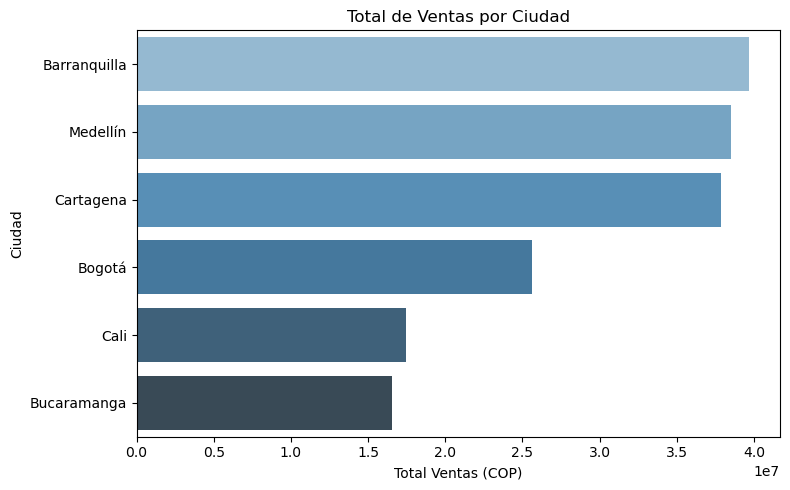

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener los datos
df_ciudad = ventas_por_ciudad()

# Crear gráfico
plt.figure(figsize=(8, 5))
sns.barplot(data=df_ciudad, x="total_ventas", y="ciudad", palette="Blues_d")
plt.title("Total de Ventas por Ciudad")
plt.xlabel("Total Ventas (COP)")
plt.ylabel("Ciudad")
plt.tight_layout()
plt.show()


 2. Gráfico de líneas: Ventas por día

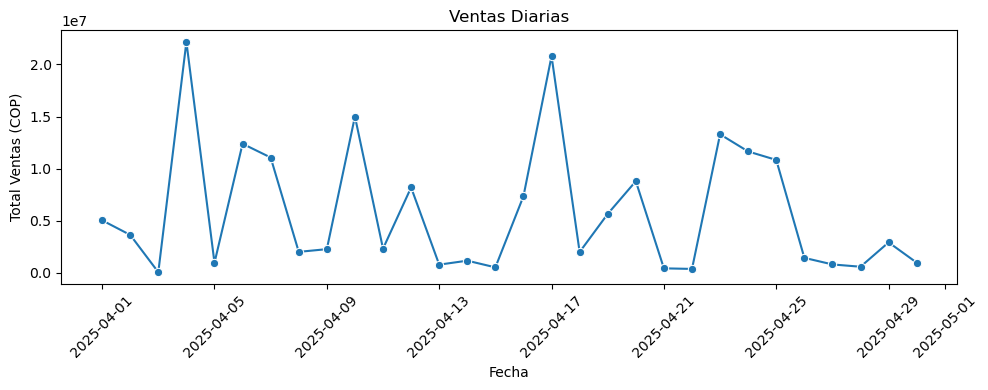

In [14]:
df_dia = ventas_por_dia()
df_dia['fecha'] = pd.to_datetime(df_dia['fecha'])

plt.figure(figsize=(10, 4))
sns.lineplot(data=df_dia, x="fecha", y="total_ventas", marker="o")
plt.title("Ventas Diarias")
plt.xlabel("Fecha")
plt.ylabel("Total Ventas (COP)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


3. Gráfico de barras: Top productos más vendidos

C:\Users\mauri\AppData\Local\Temp\ipykernel_13420\1076714614.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top, x="total_vendida", y="producto", palette="YlGn")


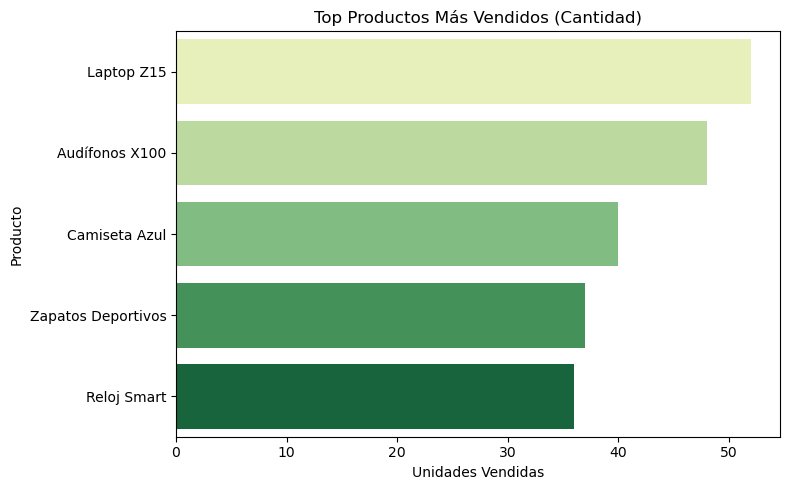

In [15]:
df_top = productos_top_vendidos()

plt.figure(figsize=(8, 5))
sns.barplot(data=df_top, x="total_vendida", y="producto", palette="YlGn")
plt.title("Top Productos Más Vendidos (Cantidad)")
plt.xlabel("Unidades Vendidas")
plt.ylabel("Producto")
plt.tight_layout()
plt.show()


4. Gráfico de barras: Precio promedio por categoría

C:\Users\mauri\AppData\Local\Temp\ipykernel_13420\4026441182.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_precio, x="precio_promedio", y="categoria", palette="Purples")


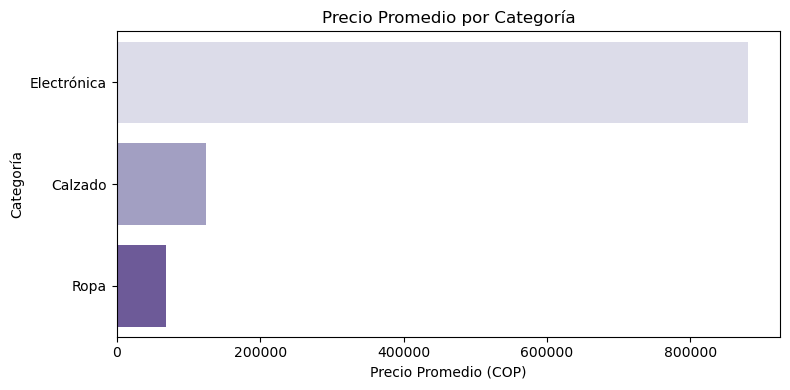

In [16]:
df_precio = precio_promedio_por_categoria()

plt.figure(figsize=(8, 4))
sns.barplot(data=df_precio, x="precio_promedio", y="categoria", palette="Purples")
plt.title("Precio Promedio por Categoría")
plt.xlabel("Precio Promedio (COP)")
plt.ylabel("Categoría")
plt.tight_layout()
plt.show()
